In [92]:
import pandas as pd

# 讀取 A1 與 A2 資料
a1 = pd.read_csv("data/A1.csv")

# 讀取 A2_1 到 A2_12 資料
a2_list = []
for i in range(1, 13):
    df = pd.read_csv(f"data/A2_{i}.csv")
    a2_list.append(df)

# 顯示 A1 和前兩個 A2 資料的前幾列
a1.head()
a2_list[0].head()
a2_list[1].head()

C:\Users\yuanr\AppData\Local\Temp\ipykernel_49800\3650362861.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/A2_{i}.csv")
C:\Users\yuanr\AppData\Local\Temp\ipykernel_49800\3650362861.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/A2_{i}.csv")
C:\Users\yuanr\AppData\Local\Temp\ipykernel_49800\3650362861.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/A2_{i}.csv")
C:\Users\yuanr\AppData\Local\Temp\ipykernel_49800\3650362861.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/A2_{i}.csv")
C:\Users\yuanr\AppData\Local\Temp\ipykernel_49800\3650362861.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd

,發生年度,發生月份,發生日期,發生時間,事故類別名稱,處理單位名稱警局層,發生地點,天候名稱,光線名稱,道路類別-第1當事者-名稱,...,當事者行動狀態子類別名稱,車輛撞擊部位大類別名稱-最初,車輛撞擊部位子類別名稱-最初,車輛撞擊部位大類別名稱-其他,車輛撞擊部位子類別名稱-其他,肇因研判大類別名稱-個別,肇因研判子類別名稱-個別,肇事逃逸類別名稱-是否肇逃,經度,緯度
0,2023,2.0,20230201.0,700.0,A2,新北市政府警察局,新北市新莊區新北市新莊區福壽街241079號燈桿,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,右轉彎,汽車,右側車身,汽車,右側車身,駕駛人,未依規定讓車,否,121.457976,25.048094
1,2023,2.0,20230201.0,700.0,A2,新北市政府警察局,新北市新莊區新北市新莊區福壽街241079號燈桿,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,向前直行中,機車,左側車身,機車,左側車身,無(車輛駕駛人因素),尚未發現肇事因素,否,121.457976,25.048094
2,2023,2.0,20230201.0,2000.0,A2,臺北市政府警察局,臺北市中正區臨沂街 / 臺北市中正區臨沂街,陰,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,向前直行中,機車,右側車身,機車,右側車身,駕駛人,未依規定讓車,否,121.530250,25.041152
3,2023,2.0,20230201.0,2000.0,A2,臺北市政府警察局,臺北市中正區臨沂街 / 臺北市中正區臨沂街,陰,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,向前直行中,汽車,前車頭,汽車,前車頭,駕駛人,超速失控,否,121.530250,25.041152
4,2023,2.0,20230201.0,2300.0,A2,臺中市政府警察局,臺中市北區健行里忠明路 / 臺中市北區健行里忠太西路,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,左轉彎,汽車,右側車身,NaN,NaN,駕駛人,未依規定讓車,否,120.668095,24.162861


### 去掉當事者順位不為 1 的欄位，當事者順位為 1 的欄位通常是肇責最高的當事者

In [93]:
drop_list = [""]

# 將 A1 和 A2 資料合併
# 並刪除當事者順位不為 1 的資料
df = pd.concat([a1] + a2_list, ignore_index=True)
df = df[df["當事者順位"] == 1]
df.head()


,發生年度,發生月份,發生日期,發生時間,事故類別名稱,處理單位名稱警局層,發生地點,天候名稱,光線名稱,道路類別-第1當事者-名稱,...,當事者行動狀態子類別名稱,車輛撞擊部位大類別名稱-最初,車輛撞擊部位子類別名稱-最初,車輛撞擊部位大類別名稱-其他,車輛撞擊部位子類別名稱-其他,肇因研判大類別名稱-個別,肇因研判子類別名稱-個別,肇事逃逸類別名稱-是否肇逃,經度,緯度
0,2023,1.0,20230101.0,140800.0,A1,雲林縣警察局,雲林縣崙背鄉五魁村雲11鄉道路燈桿225403號處,晴,日間自然光線,村里道路,...,向前直行中,機車,前車頭,NaN,NaN,駕駛人,逆向行駛,否,120.322165,23.774017
2,2023,1.0,20230101.0,144312.0,A1,臺南市政府警察局,臺南市北門區錦湖里區道南2線東側 / 臺南市北門區錦湖里省道臺17線北側,陰,日間自然光線,省道,...,向前直行中,汽車,前車頭,NaN,NaN,駕駛人,酒醉(後)駕駛失控,否,120.146720,23.293584
8,2023,1.0,20230101.0,195000.0,A1,新竹市警察局,新竹市東區光復路二段與食品路口,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,...,左轉彎,機車,右側車身,機車,右側車身,駕駛人,未依規定讓車,否,120.983089,24.802194
10,2023,1.0,20230102.0,80700.0,A1,桃園市政府警察局,桃園市八德區新興路741號前0.0公尺,雨,日間自然光線,市區道路,...,向前直行中,汽車,前車頭,汽車,前車頭,駕駛人,逆向行駛,否,121.281553,24.946257
13,2023,1.0,20230102.0,131100.0,A1,新北市政府警察局,新北市新莊區新北市新莊區新北大道4段244556燈桿旁,晴,日間自然光線,市區道路,...,向前直行中,機車,前車頭,機車,前車頭,其他,不明原因肇事,否,121.450000,25.033333


In [94]:
reserve_list = ["事故類別名稱", "天候名稱", "光線名稱", "道路類別-第1當事者-名稱", "速限-第1當事者", "道路型態子類別名稱", "路面狀況-路面鋪裝名稱", "路面狀況-路面狀態名稱", "路面狀況-路面缺陷名稱", "號誌-號誌種類名稱", "事故類型及型態子類別名稱", "肇因研判子類別名稱-主要", "當事者屬-性-別名稱", "當事者事故發生時年齡", "車輛撞擊部位大類別名稱-最初"]
df = df[reserve_list]
df = df.dropna()
print(df.head())


   事故類別名稱 天候名稱               光線名稱 道路類別-第1當事者-名稱  速限-第1當事者 道路型態子類別名稱  \
0      A1    晴             日間自然光線          村里道路      50.0        直路   
2      A1    陰             日間自然光線            省道      50.0       四岔路   
8      A1    晴  夜間(或隧道、地下道、涵洞)有照明          市區道路      50.0       四岔路   
10     A1    雨             日間自然光線          市區道路      40.0        直路   
13     A1    晴             日間自然光線          市區道路      60.0    彎曲路及附近   

   路面狀況-路面鋪裝名稱 路面狀況-路面狀態名稱 路面狀況-路面缺陷名稱 號誌-號誌種類名稱 事故類型及型態子類別名稱 肇因研判子類別名稱-主要  \
0           柏油          乾燥         無缺陷       無號誌       撞路樹、電桿         逆向行駛   
2           柏油          乾燥         無缺陷    行車管制號誌       撞護欄(樁)    酒醉(後)駕駛失控   
8           柏油          乾燥         無缺陷    行車管制號誌           側撞       未依規定讓車   
10          柏油          濕潤         無缺陷       無號誌           對撞         逆向行駛   
13          柏油          乾燥         無缺陷       無號誌         撞交通島       不明原因肇事   

   當事者屬-性-別名稱  當事者事故發生時年齡 車輛撞擊部位大類別名稱-最初  
0           男        44.0             機車  
2           男     

### 當事人年齡對車禍是否死亡的影響

In [119]:
import pandas as pd
import statsmodels.formula.api as smf

# 建立 y 與天候 dummy
df = df.dropna(subset=["事故類別名稱", "天候名稱", "當事者屬-性-別名稱", "當事者事故發生時年齡"])
df = df[(df["當事者事故發生時年齡"] > 0) & (df["當事者事故發生時年齡"] < 100)]
df = df[df["當事者事故發生時年齡"] != -1]  # drop age = -1
df["a1"] = (df["事故類別名稱"] == "A1").astype(int)

a1 = df["a1"]
age = df["當事者事故發生時年齡"]


# 建立模型資料集
df_model = pd.concat([df["a1"], age.rename("age")], axis=1)

# 自動產生公式
predictors = df_model.columns.difference(["a1"])
formula = "a1 ~ " + " + ".join(predictors)

# 建模
model = smf.logit(formula, data=df_model)
result = model.fit()

# 顯示結果
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.027971
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                     a1   No. Observations:               397780
Model:                          Logit   Df Residuals:                   397778
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 May 2025   Pseudo R-squ.:                0.009347
Time:                        17:45:18   Log-Likelihood:                -11126.
converged:                       True   LL-Null:                       -11231.
Covariance Type:            nonrobust   LLR p-value:                 1.406e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2897      0.068    -92.338      0.000      -6.423      -6.156
age            0.0190      0

Text(0.5, 1.0, 'Age and Number of death in car accidents')

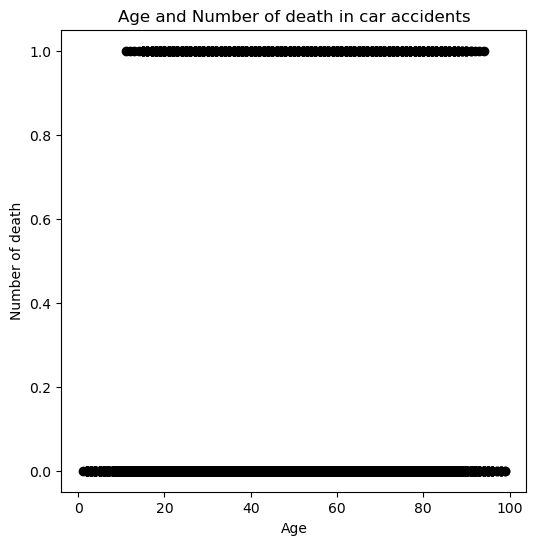

In [118]:
import matplotlib.pyplot as plt
# 僅保留 0 < 年齡 < 100 的資料
df = df[(df["當事者事故發生時年齡"] > 0) & (df["當事者事故發生時年齡"] < 100)]

a1 = df["a1"]
age = df["當事者事故發生時年齡"]
plt.figure(figsize = (6, 6))
plt.plot(age, a1, 'o', color = 'black') 
plt.xlabel('Age')
plt.ylabel('Number of death')
plt.title('Age and Number of death in car accidents')

### 天氣與當事人年齡對車禍是否死亡的影響

In [120]:
import pandas as pd
import statsmodels.formula.api as smf

# 建立 y 與天候 dummy
df = df.dropna(subset=["事故類別名稱", "天候名稱", "當事者屬-性-別名稱", "當事者事故發生時年齡"])
df = df[(df["當事者事故發生時年齡"] > 0) & (df["當事者事故發生時年齡"] < 100)]
df = df[df["當事者事故發生時年齡"] != -1]  # drop age = -1
df["a1"] = (df["事故類別名稱"] == "A1").astype(int)


gender_dummies = pd.get_dummies(df["當事者屬-性-別名稱"], prefix="gender")
gender_dummies = gender_dummies.drop(columns=["gender_肇事逃逸尚未查獲"])


df["天候名稱"] = df["天候名稱"].replace({"風": "雨", "陰": "晴"})
df["天候名稱"] = df["天候名稱"].replace("暴雨", "雨")
df["天候名稱"] = df["天候名稱"].replace({"雪": "雨", "強風": "雨", "風沙": "雨", "霧或煙": "雨"})

weather_dummies = pd.get_dummies(df["天候名稱"], prefix="weather", drop_first=True)
age = df["當事者事故發生時年齡"]


# 建立模型資料集
df_model = pd.concat([df["a1"], weather_dummies], axis=1)

# 自動產生公式
predictors = df_model.columns.difference(["a1"])
formula = "a1 ~ " + " + ".join(predictors)

# 建模
model = smf.logit(formula, data=df_model)
result = model.fit()

# 顯示結果
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.028235
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     a1   No. Observations:               397780
Model:                          Logit   Df Residuals:                   397778
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 May 2025   Pseudo R-squ.:               4.409e-07
Time:                        18:19:29   Log-Likelihood:                -11231.
converged:                       True   LL-Null:                       -11231.
Covariance Type:            nonrobust   LLR p-value:                    0.9207
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.4237      0.025   -217.013      0.000      -5.473      -5.375
weather_

### 光線與當事人年齡對車禍是否死亡的影響

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

df = df.dropna(subset=["事故類別名稱", "天候名稱", "當事者屬-性-別名稱", "當事者事故發生時年齡"])
df = df[(df["當事者事故發生時年齡"] > 0) & (df["當事者事故發生時年齡"] < 100)]
df = df[df["當事者事故發生時年齡"] != -1]  # drop age = -1
df["a1"] = (df["事故類別名稱"] == "A1").astype(int)


# 把夜間無照明合併進無照明
df["光線名稱"] = df["光線名稱"].replace("夜間(或隧道、地下道、涵洞)無照明", "無照明")
print(df.shape)
light_dummies = pd.get_dummies(df["光線名稱"], prefix="light", drop_first=True)


# 建立模型資料集
df_model = pd.concat([df["a1"], age.rename("age"), light_dummies], axis=1)

# 自動產生公式
predictors = df_model.columns.difference(["a1"])
formula = "a1 ~ " + " + ".join(predictors)

# 建模
model = smf.logit(formula, data=df_model)
result = model.fit()

# 顯示結果
print(result.summary())


(398960, 16)
Optimization terminated successfully.
         Current function value: 0.027866
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                     a1   No. Observations:               398960
Model:                          Logit   Df Residuals:                   398953
Method:                           MLE   Df Model:                            6
Date:                Fri, 23 May 2025   Pseudo R-squ.:                 0.01060
Time:                        17:27:07   Log-Likelihood:                -11117.
converged:                       True   LL-Null:                       -11236.
Covariance Type:            nonrobust   LLR p-value:                 1.380e-48
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8221      0.083    -70.048      0.000 

### 路面狀況對車禍是否死亡的影響

影響不明顯


In [107]:
import pandas as pd
import statsmodels.formula.api as smf

df = df.dropna(subset=["事故類別名稱", "路面狀況-路面狀態名稱"])
df["a1"] = (df["事故類別名稱"] == "A1").astype(int)

# 替換狀態為「濕潤」群組
df["路面狀況-路面狀態名稱"] = df["路面狀況-路面狀態名稱"].replace({
    "油滑": "濕潤",
    "泥濘": "濕潤",
    "冰雪": "濕潤"
})

# 產生所有 dummy（不 drop）
road_dummies = pd.get_dummies(df["路面狀況-路面狀態名稱"], prefix="road")

# 查看欄位名稱
print(road_dummies.columns)
# 例：Index(['road_乾燥', 'road_濕潤', 'road_積水', ...], dtype='object')

# 手動 drop「濕潤」
road_dummies = road_dummies.drop(columns=["road_濕潤"])
# 建立模型資料集
df_model = pd.concat([df["a1"], road_dummies], axis=1)

# 自動產生公式
predictors = df_model.columns.difference(["a1"])
formula = "a1 ~ " + " + ".join(predictors)

# 建模
model = smf.logit(formula, data=df_model)
result = model.fit()

# 顯示結果
print(result.summary())




Index(['road_乾燥', 'road_濕潤'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.028164
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     a1   No. Observations:               398960
Model:                          Logit   Df Residuals:                   398958
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 May 2025   Pseudo R-squ.:               1.625e-05
Time:                        17:33:33   Log-Likelihood:                -11236.
converged:                       True   LL-Null:                       -11236.
Covariance Type:            nonrobust   LLR p-value:                    0.5456
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.4699      0.077    -70.959    